We will consider the source's brightness to be measured in terms of counts per second our imaginary X-ray detector observes from the source. The source's "true" brightness as a function of time will be represented as a sine curve plus a constant average brightness. The period (T) of the variability is 200 seconds, the constant average brightness (B0) is 10 counts/s, and the amplitude of the sine curve is 1 counts/s. 

$$\text{B}(t) = A \times sin(\frac{2\pi}{T} t) + B_0$$

1.a) (3 points) Create a function to calculate the true count rate. The function should take time as a required argument and the period, constant average brightness, and amplitude should be optional keyword arguments with the above values set as the defaults. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def true_brightness(time, period = 200, B_o = 10, Amplitude = 1):
    return Amplitude * np.sin(2 * np.pi * time / period) + B_o #b(t) = A sin(2πt/T) + B_o ; A=1,T=200,B_o=10


b) (1 point) Create an array called time_array that starts at 0 seconds and ends at 1,000 seconds with a step size of 1 second. 

In [ ]:
time_array = np.arange(0, 1001) #1000 + 1 to include 1000

c) (1 point) Calculate the true count rate at each time in time_array using your function from part a) and assign it to a variable called true_count_rate. 

In [149]:
true_count_rate = true_brightness(time_array)

d) (2 points) Make a plot with time_array on the x-axis and true_count_rate on the y-axis with a line as the plot marker. 

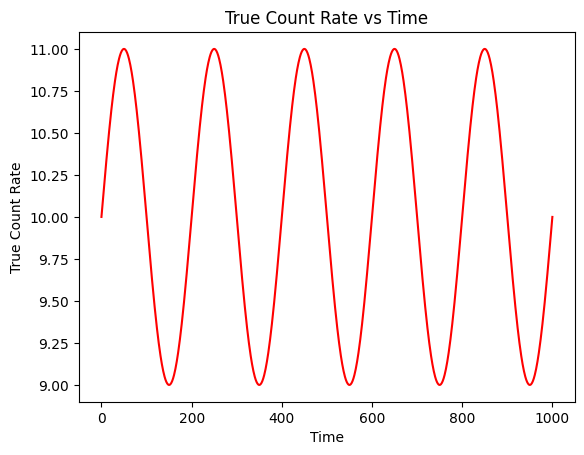

In [ ]:
plt.plot(time_array, true_count_rate, '-r')
plt.xlabel('Time') #label the title the plot
plt.ylabel('True Count Rate')
plt.title('True Count Rate vs Time')
plt.show()

2. a) (2 points) Create the fake data by adding some noise to true_count_rate . Do this by adding np.random.normal(size=len(true_count_rate), scale=(true_count_rate)**0.5) to true_count_rate and set it equal to a variable called measured_data.

np.random.normal() creates an array where the values will be randomly distributed as a Normal function (like a bell curve), the scale parameter tells it what the standard deviation should be. Here we tell it to be the square root of the number of counts (this comes from counting statistics which we'll cover later). 

In [ ]:
measured_data = true_count_rate + np.random.normal(size=len(true_count_rate), scale=(true_count_rate)**0.5) #adding noise to the data

b) (3 points) Make a plot with time_array on the x-axis and measured_data on the y-axis with circles as the plot markers. Can you still see the periodic behavior? 

Text(0.5, 1.0, 'Measured Data vs Time')

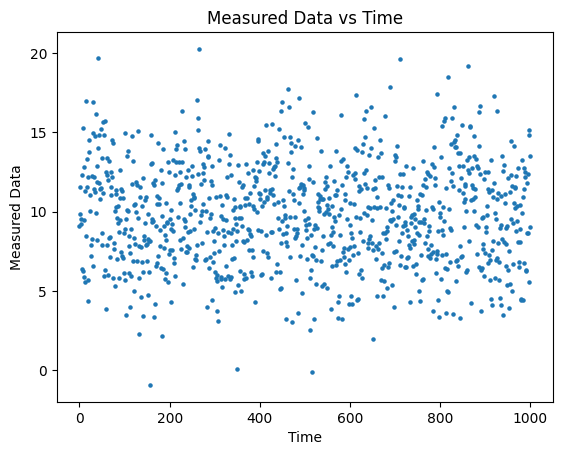

In [ ]:
plt.scatter(time_array, measured_data, 5) #scatter plot of the measured data with noise
plt.xlabel('Time')
plt.ylabel('Measured Data')
plt.title('Measured Data vs Time')

3. A moving average is statistical technique used to try to make noisy data look smoother, by displaying the values that are averaged over neighboring observations. Here we want to calculate a moving average of measured_data at each time in time_array . This will be done by going through each time and taking the mean of a slice of the measured_data array centered on the index corresponding to that time.

a) (10 pts)

You are to make a function called moving_average that has two inputs, an array (named however you wish) and an integer named Nslice. The array input will be the array the moving average will be calculated for and Nslice will specify how big the slice of the array will be.
The moving average at a specific index should be calculated using the values of the array that range from that index - Nslice to that index + Nslice . So for example if Nslice=2 the moving average for index=4 should be calculated using the values of the array at indexes 2, 3, 4, 5, and 6.
The output of the function should be an array with the same length as the input array.
As is often the case when making a function there may be "corner cases" that need a different method. Here a corner case will be when you are close to the start or end of the array the size of the slice you want to take may go past the bounds of the array. You will need to program in checks to see if that is the case, and if so have an alternative way to handle these cases (Hint: this may be handled by branching with if statements).
For example if Nslice=2 the moving average at index = 1, index - Nslice would give you -1, which is no longer close to index = 1 so we do not want to include it. In this case we would want to use a smaller slice and make sure to keep index=1 at the center of the slice. 

In [ ]:
def moving_average(myList, Nslice):
    avg_list = np.zeros(len(myList), dtype=float) # create a array of 0s to store the average values
    for i in range(len(myList)):
        if i < Nslice:
            #If the index is less than the window size, average the indices from 0 -> i and i to the window size
            avg_list[i] = (np.sum(myList[0:i+Nslice])/(len(myList[0:i+Nslice])))
        else:
            #If the index is greater than the window size, average the indices Nsclice before and after the index
            avg_list[i] = (np.sum(myList[i-Nslice:i+Nslice])/(len(myList[i-Nslice:i+Nslice])))
        
    return avg_list

b) (3 pts) Calculate the moving average of your measured_data with an Nslice=4 using your function. Plot the result on the y-axis with time_array as the x-axis with circles as your plot markers. Can the periodic behavior be seen now? 

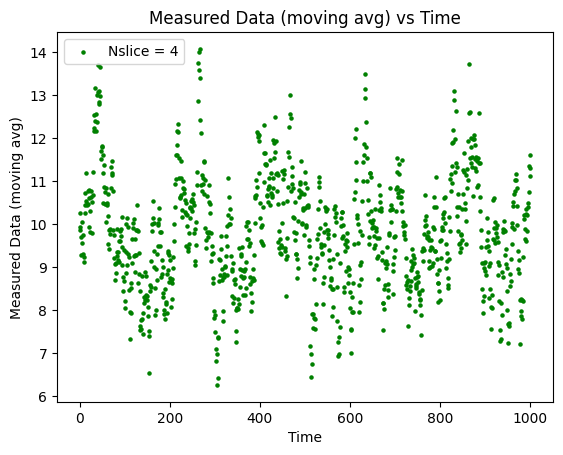

In [ ]:
measured_data_moving_avg = moving_average(measured_data, 4) # moving average of the measured data with a window size of 4

plt.scatter(time_array, measured_data_moving_avg, 5, 'green', label="Nslice = 4")
plt.xlabel('Time')
plt.ylabel('Measured Data (moving avg)')
plt.title('Measured Data (moving avg) vs Time')
plt.legend()
plt.show()

c) (5 pts) Repeat the previous step for Nslice equal to 10, 30, and 100. Making a plot for each. Describe the behavior you see as you keep increasing Nslice, and explain why you think that may be happening. 

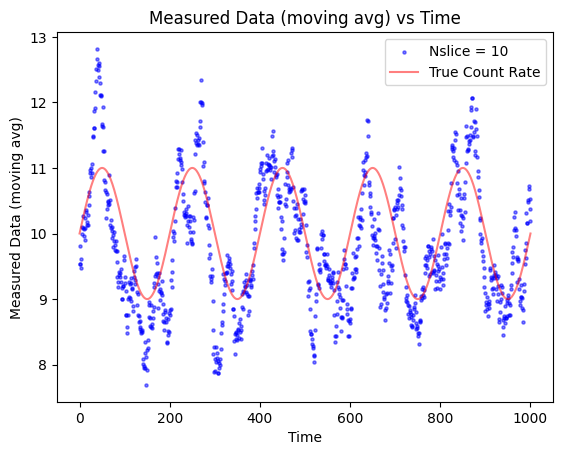

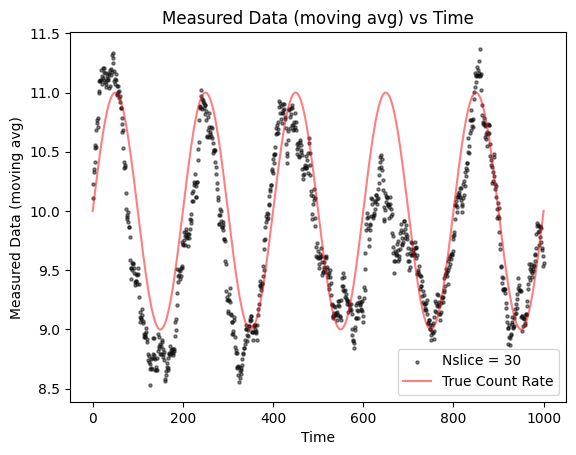

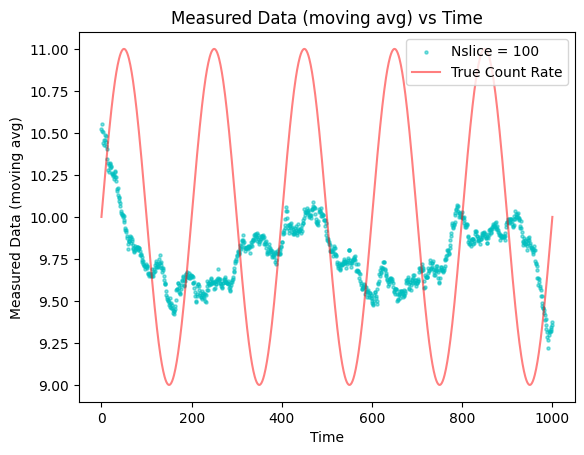

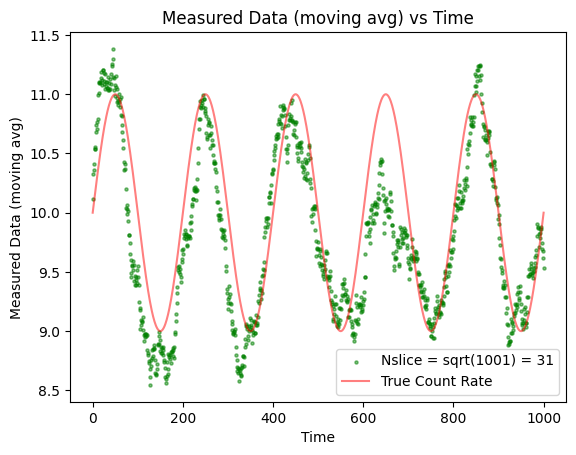

In [179]:
avg_data_nslice_10 = moving_average(measured_data, 10) #Nclice = 10
avg_data_nslice_30 = moving_average(measured_data, 30) #Nclice = 30
avg_data_nslice_100 = moving_average(measured_data, 100) #Nclice = 100

# I had a hunch that a Nslice of sqrt(length of the data) would be the optimal window size and wanted to test is out
avg_data_nslice_sqrt = moving_average(measured_data, int(np.sqrt(len(measured_data))))

# Create plots for Nclice = 10, 30, 100, and sqrt(length of the data)

plt.scatter(time_array, avg_data_nslice_10, 5, 'b', alpha=0.5, label="Nslice = 10")
plt.plot(time_array, true_count_rate, '-r', alpha=0.5, label='True Count Rate') # Plotting the pure data to compare with the moving average
plt.xlabel('Time')
plt.ylabel('Measured Data (moving avg)')
plt.title('Measured Data (moving avg) vs Time')
plt.legend()
plt.show()

plt.scatter(time_array, avg_data_nslice_30, 5, '#0f0f0f', alpha=0.5, label="Nslice = 30")
plt.plot(time_array, true_count_rate, '-r', alpha=0.5, label='True Count Rate') # Plotting the pure data to compare with the moving average
plt.xlabel('Time')
plt.ylabel('Measured Data (moving avg)')
plt.title('Measured Data (moving avg) vs Time')
plt.legend()
plt.show()

plt.scatter(time_array, avg_data_nslice_100, 5, 'c', alpha=0.5, label="Nslice = 100")
plt.plot(time_array, true_count_rate, '-r', alpha=0.5, label='True Count Rate') # Plotting the pure data to compare with the moving average
plt.xlabel('Time')
plt.ylabel('Measured Data (moving avg)')
plt.title('Measured Data (moving avg) vs Time')
plt.legend()
plt.show()

plt.scatter(time_array, avg_data_nslice_sqrt, 5, 'g', alpha=0.5, \
            label=f"Nslice = sqrt({len(measured_data)}) = {int(np.sqrt(len(measured_data)))}")
plt.plot(time_array, true_count_rate, '-r', alpha=0.5, label='True Count Rate') # Plotting the pure data to compare with the moving average
plt.xlabel('Time')
plt.ylabel('Measured Data (moving avg)')
plt.title('Measured Data (moving avg) vs Time')
plt.legend()
plt.show()


## Description:

It looks like as you increase the Nslice value, the clarity of the graph increases, looking less like random noise and more like a sinusoidal wave. But, with larger Nslice values more large inaccuracies are introduced; the 100 Nslice graph's amplitude varies much more over time than 10 or 30. Given the pure brightness has a constant amplitude, the Nslice 10 and 30 graph are more useful here than 100. Overall, moving average helps us clean up noisy data but can lead to inaccurate and misleading data if overused.